In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from local_plot import *
from utils import *
def read_multi_folder(folder, nodes, enable_pgo=True):
    paths = {}
    paths_pgo = {}
    t0 = None
    for i in nodes:
        output_folder = folder + str(i) + "/"
        _paths, t0 = read_paths(output_folder, [i], t0=t0)
        if enable_pgo:
            _paths_pgo, t0 = read_paths(output_folder, [i], prefix="pgo_", t0=t0)
            paths_pgo[i] = _paths_pgo[i]
        paths[i] = _paths[i]
    if len(paths_pgo) == 0:
        return paths, None, t0
    return paths, paths_pgo, t0


In [ ]:
nodes = [1, 2, 5, 6, 7]
output_folder = "/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/outputs/d2vins-5-sync/swarm"
data_folder="/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14"
dte = 550
paths, paths_pgo, t0 = read_multi_folder(output_folder, nodes, enable_pgo=False)
paths_gt, _ = read_paths(data_folder, nodes, prefix="eight_noyaw_", suffix="-groundtruth.txt", t0=t0)
align_paths(paths, paths_gt, align_by_first=True)
if paths_pgo is not None:
    align_paths(paths_pgo, paths_gt, align_by_first=True)
display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
display(plot_relative_pose_err(1, nodes[1:], paths, paths_gt, dte=dte, show=False))

paths_vo, t0 = read_paths(data_folder, nodes, prefix="vins-mono_noyaw_", t0=t0)
print("VINS-Mono")
align_paths(paths_vo, paths_gt)
display(plot_fused_err(nodes, paths_vo, paths_gt, dte=dte, show=False))
display(plot_relative_pose_err(nodes[0], nodes[1:], paths_vo, paths_gt, dte=dte, show=False))

plot_fused(nodes, paths, poses_gt=paths_gt, figsize=(10,10))


In [ ]:
nodes = [1, 2, 3, 4, 5]
output_folder = "/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/outputs/d2vins-5-yaw-async/swarm"
data_folder="/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14"
dte = 550
paths, paths_pgo, t0 = read_multi_folder(output_folder, nodes, enable_pgo=False)
paths_gt, _ = read_paths(data_folder, nodes, prefix="eight_yaw_", suffix="-groundtruth.txt", t0=t0)
align_paths(paths, paths_gt, align_by_first=True)
if paths_pgo is not None:
    align_paths(paths_pgo, paths_gt, align_by_first=True)
display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
display(plot_relative_pose_err(1, nodes[1:], paths, paths_gt, dte=dte, show=False))

paths_vo, t0 = read_paths(data_folder, nodes, prefix="vins-mono_yaw_", t0=t0)
print("VINS-Mono")
align_paths(paths_vo, paths_gt)
display(plot_fused_err(nodes, paths_vo, paths_gt, dte=dte, show=False))
display(plot_relative_pose_err(nodes[0], nodes[1:], paths_vo, paths_gt, dte=dte, show=False))

plot_fused(nodes, paths, poses_gt=paths_gt, figsize=(10,10))




In [ ]:
nodes = [1, 2, 3, 4, 5]
output_folder = "/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/outputs/d2vins-5-yaw-sync/swarm"
data_folder="/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14"
dte = 550
paths, paths_pgo, t0 = read_multi_folder(output_folder, nodes, enable_pgo=False)
paths_gt, _ = read_paths(data_folder, nodes, prefix="eight_yaw_", suffix="-groundtruth.txt", t0=t0)
align_paths(paths, paths_gt, align_by_first=True)
if paths_pgo is not None:
    align_paths(paths_pgo, paths_gt, align_by_first=True)
display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
display(plot_relative_pose_err(1, nodes[1:], paths, paths_gt, dte=dte, show=False))


'<table>\n<tbody>\n<tr><td>Drone</td><td>Traj. Len.</td><td>ATE Pos</td><td>ATE Att</td><td>Cov/m: x</td><td>y      </td><td>z      </td><td>Cov Att/m</td><td>PGO:ATE Pos</td><td>ATE Att</td></tr>\n<tr><td>1by1 </td><td>237.5m    </td><td>1.470  </td><td>3.601  </td><td>4.0e-03 </td><td>6.6e-03</td><td>2.5e-04</td><td>1.23e-02 </td><td>0.196      </td><td>3.990° </td></tr>\n<tr><td>2by1 </td><td>238.9m    </td><td>1.365  </td><td>3.646  </td><td>4.2e-03 </td><td>6.3e-03</td><td>4.9e-04</td><td>2.08e-03 </td><td>0.137      </td><td>3.053° </td></tr>\n<tr><td>Avg. </td><td>238.2     </td><td>1.418  </td><td>3.62   </td><td>        </td><td>       </td><td>       </td><td>         </td><td>0.167      </td><td>3.52   </td></tr>\n</tbody>\n</table>'

'<table>\n<tbody>\n<tr><td>Relative</td><td>EST RMSE: Pos (XYZ)</td><td>POS  </td><td>Ang  </td><td>BIAS: Pos           </td><td>Ang   </td></tr>\n<tr><td>1-&gt;2    </td><td>0.026,0.020,0.026  </td><td>0.042</td><td>1.39°</td><td>-0.017,+0.007,-0.019</td><td>+0.59°</td></tr>\n<tr><td>Avg:    </td><td>                   </td><td>0.042</td><td>1.39°</td><td>                    </td><td>      </td></tr>\n</tbody>\n</table>'

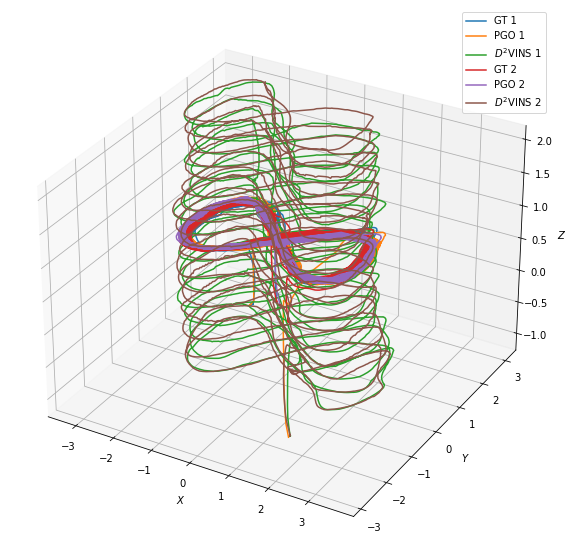

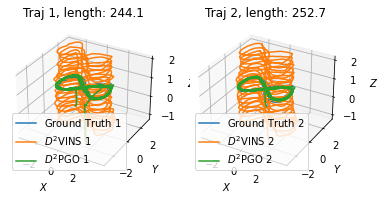

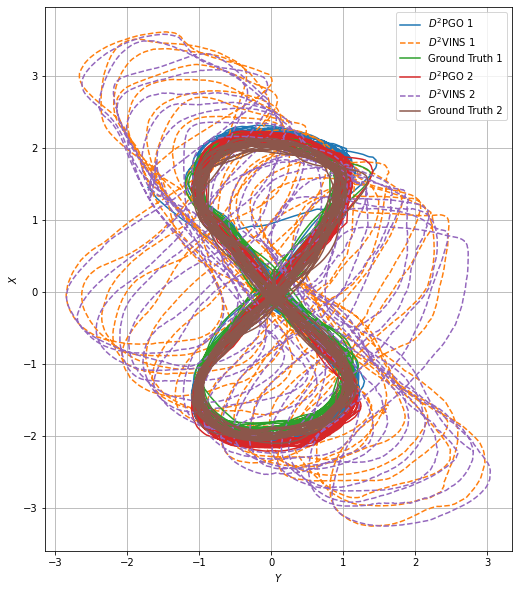

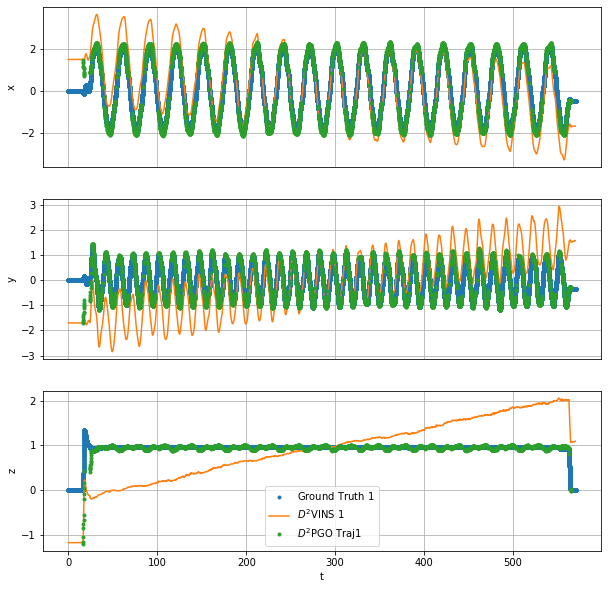

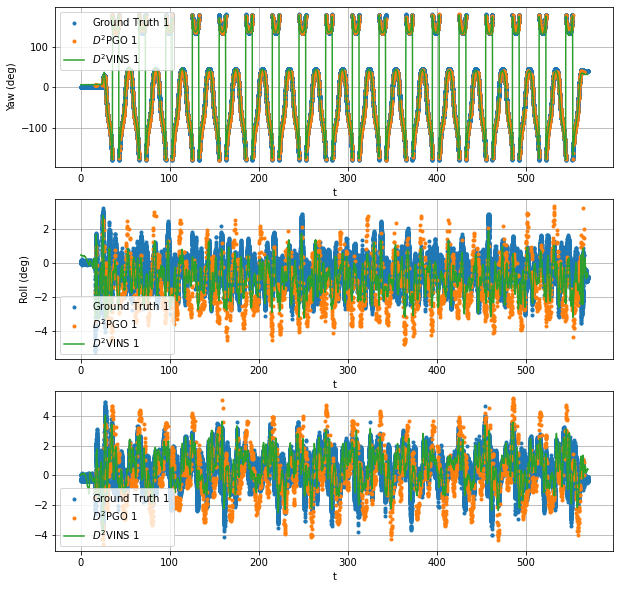

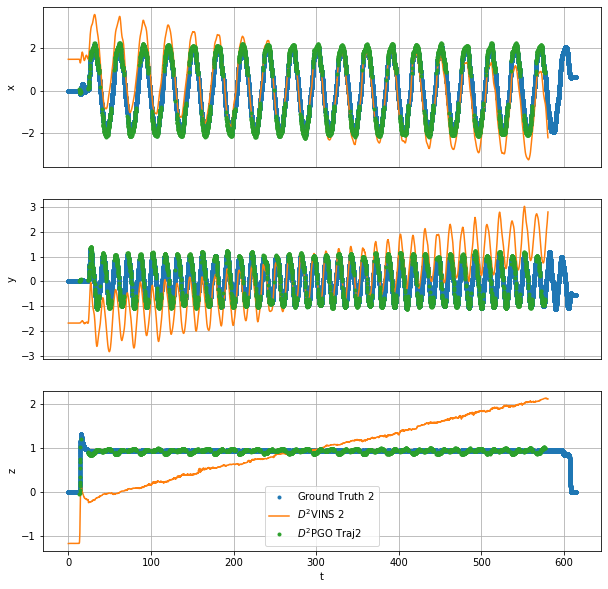

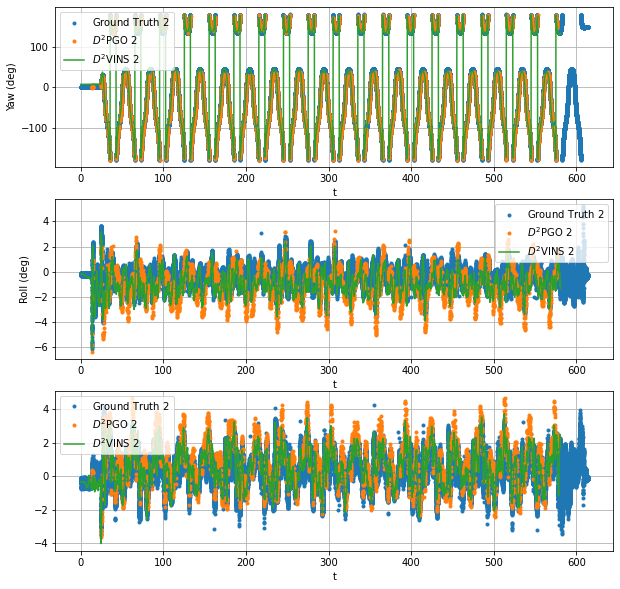

In [7]:
nodes = [1, 2]
output_folder = "/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/outputs/d2slam-2-yaw/swarm"
data_folder="/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14"
dte = 550
paths, paths_pgo, t0 = read_multi_folder(output_folder, nodes, enable_pgo=True)
paths_gt, _ = read_paths(data_folder, nodes, prefix="eight_yaw_", suffix="-groundtruth.txt", t0=t0)
align_paths(paths, paths_gt, align_by_first=True, align_with_minize=True)
if paths_pgo is not None:
    align_paths(paths_pgo, paths_gt, align_by_first=True, align_with_minize=True)
display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
display(plot_relative_pose_err(1, nodes[1:], paths, paths_gt, dte=dte, show=False))
plot_fused(nodes, paths, poses_pgo=paths_pgo, poses_gt=paths_gt, figsize=(10,10))


'<table>\n<tbody>\n<tr><td>Drone</td><td>Traj. Len.</td><td>ATE Pos</td><td>ATE Att</td><td>Cov/m: x</td><td>y      </td><td>z      </td><td>Cov Att/m</td><td>PGO:ATE Pos</td><td>ATE Att</td></tr>\n<tr><td>1by1 </td><td>242.5m    </td><td>1.441  </td><td>8.702  </td><td>4.3e-03 </td><td>6.0e-03</td><td>2.4e-04</td><td>1.11e-02 </td><td>0.180      </td><td>3.745° </td></tr>\n<tr><td>2by1 </td><td>242.0m    </td><td>1.363  </td><td>8.233  </td><td>4.4e-03 </td><td>5.7e-03</td><td>2.1e-04</td><td>2.76e-03 </td><td>0.132      </td><td>3.282° </td></tr>\n<tr><td>3by1 </td><td>242.0m    </td><td>1.495  </td><td>9.202  </td><td>4.5e-03 </td><td>7.6e-03</td><td>2.3e-04</td><td>2.79e-03 </td><td>0.129      </td><td>2.946° </td></tr>\n<tr><td>4by1 </td><td>242.5m    </td><td>1.384  </td><td>8.784  </td><td>3.9e-03 </td><td>7.1e-03</td><td>2.1e-04</td><td>3.54e-03 </td><td>0.128      </td><td>4.093° </td></tr>\n<tr><td>5by1 </td><td>244.4m    </td><td>1.354  </td><td>8.446  </td><td>3.7e-03 </td><td>6.7e-03</td><td>2.2e-04</td><td>2.39e-03 </td><td>0.127      </td><td>2.959° </td></tr>\n<tr><td>Avg. </td><td>242.7     </td><td>1.408  </td><td>8.67   </td><td>        </td><td>       </td><td>       </td><td>         </td><td>0.139      </td><td>3.40   </td></tr>\n</tbody>\n</table>'

'<table>\n<tbody>\n<tr><td>Relative</td><td>EST RMSE: Pos (XYZ)</td><td>POS  </td><td>Ang  </td><td>BIAS: Pos           </td><td>Ang   </td></tr>\n<tr><td>1-&gt;2    </td><td>0.021,0.014,0.009  </td><td>0.027</td><td>0.98°</td><td>-0.013,+0.003,+0.002</td><td>+0.23°</td></tr>\n<tr><td>1-&gt;3    </td><td>0.024,0.017,0.009  </td><td>0.031</td><td>0.95°</td><td>-0.011,+0.005,+0.001</td><td>+0.33°</td></tr>\n<tr><td>1-&gt;4    </td><td>0.026,0.020,0.009  </td><td>0.034</td><td>0.95°</td><td>-0.010,+0.006,+0.001</td><td>+0.30°</td></tr>\n<tr><td>1-&gt;5    </td><td>0.025,0.018,0.010  </td><td>0.032</td><td>1.07°</td><td>-0.009,+0.004,+0.002</td><td>+0.35°</td></tr>\n<tr><td>Avg:    </td><td>                   </td><td>0.031</td><td>0.99°</td><td>                    </td><td>      </td></tr>\n</tbody>\n</table>'

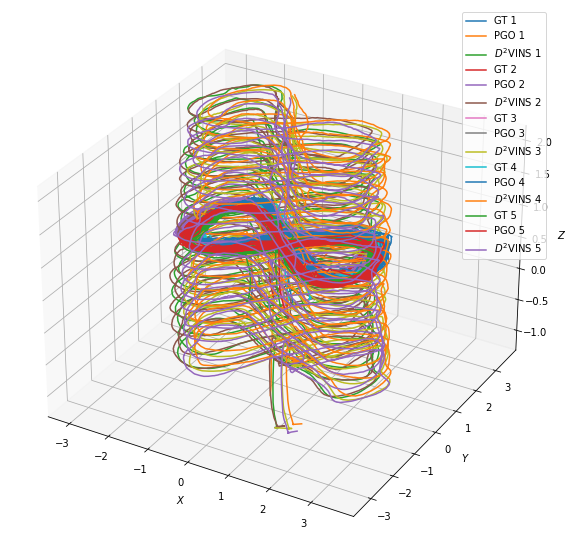

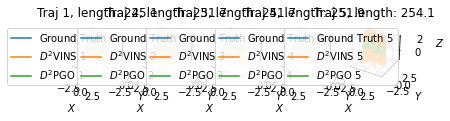

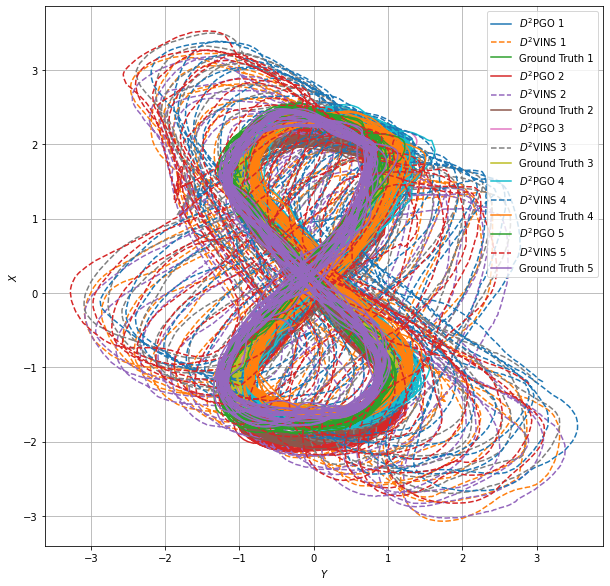

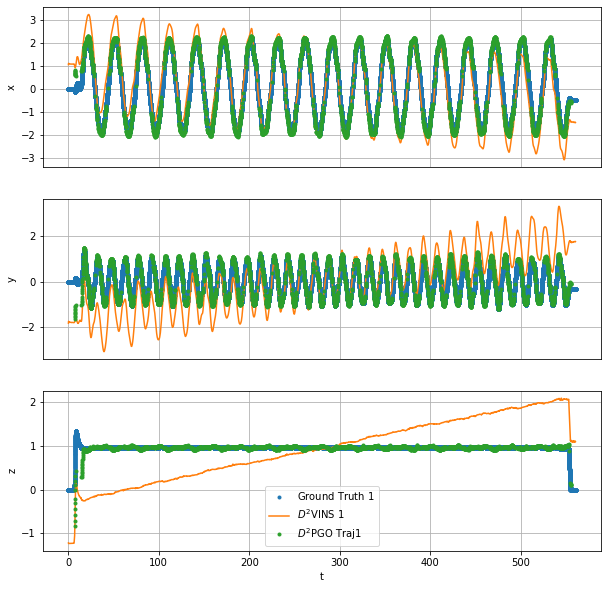

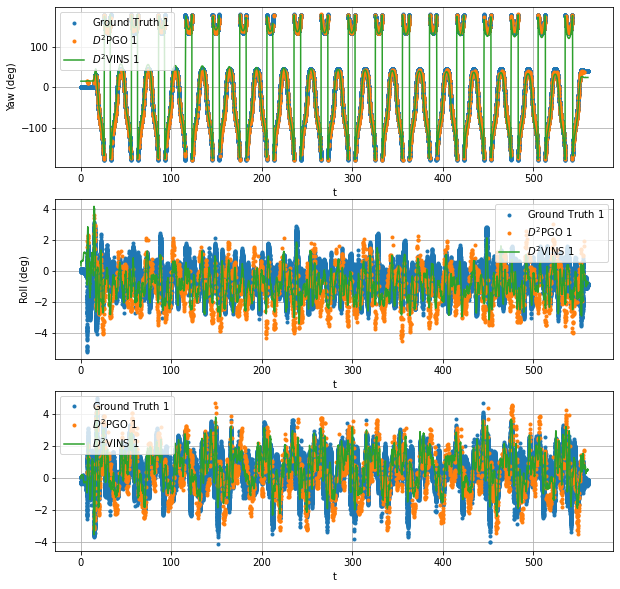

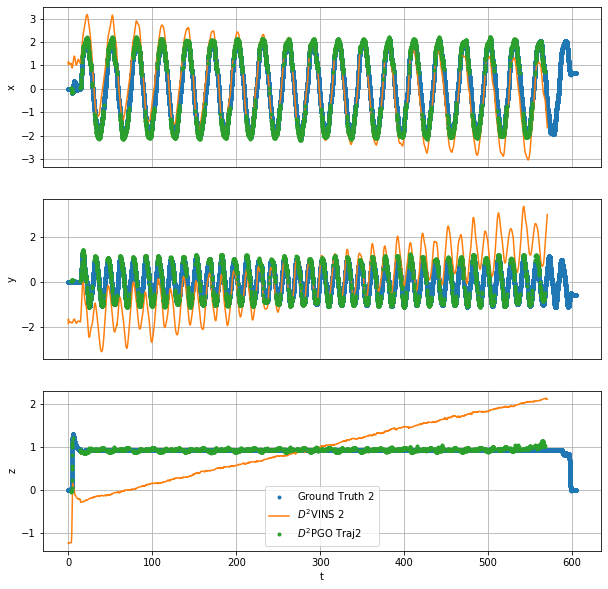

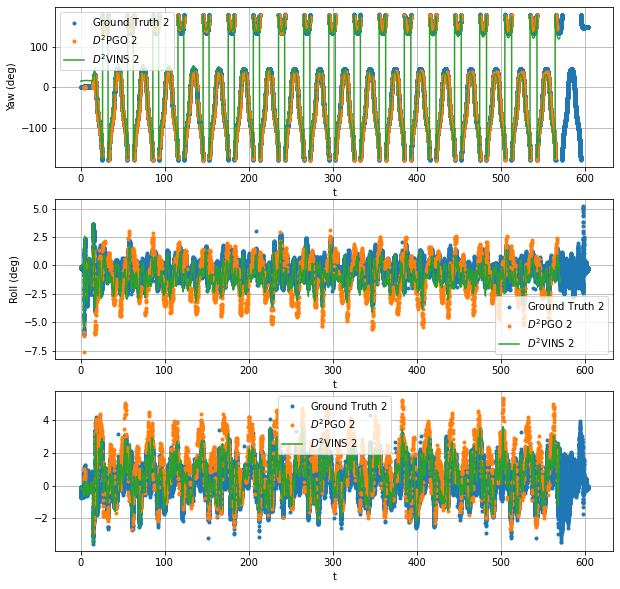

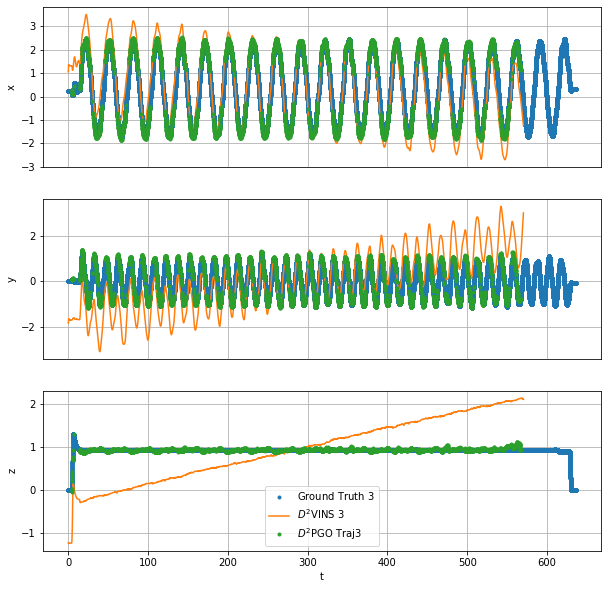

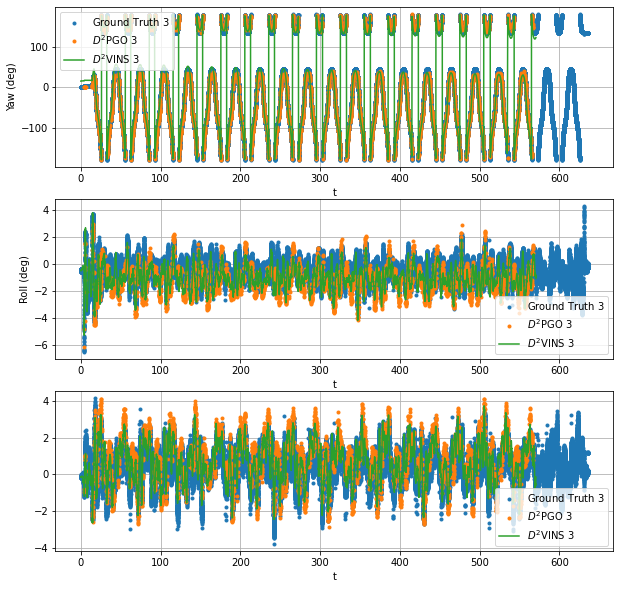

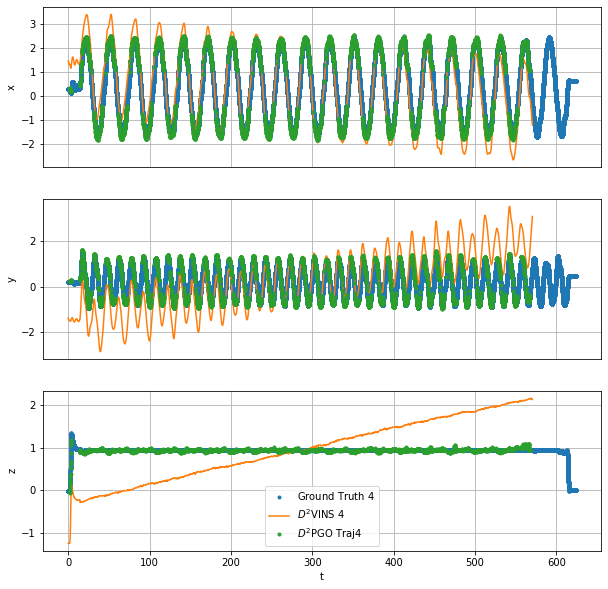

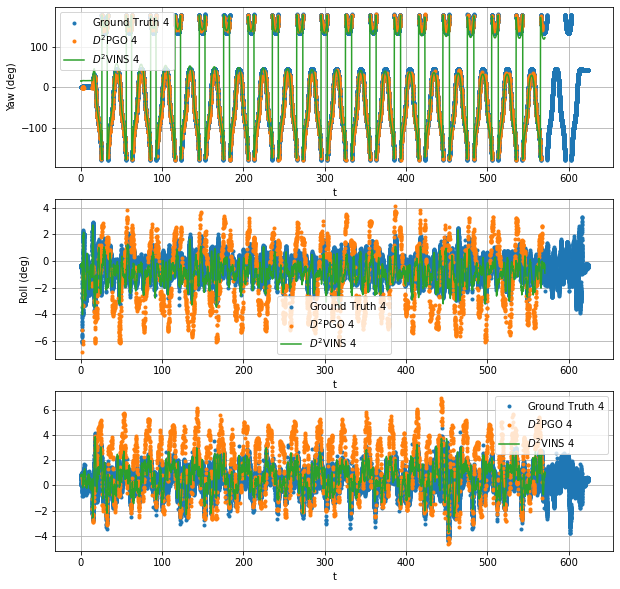

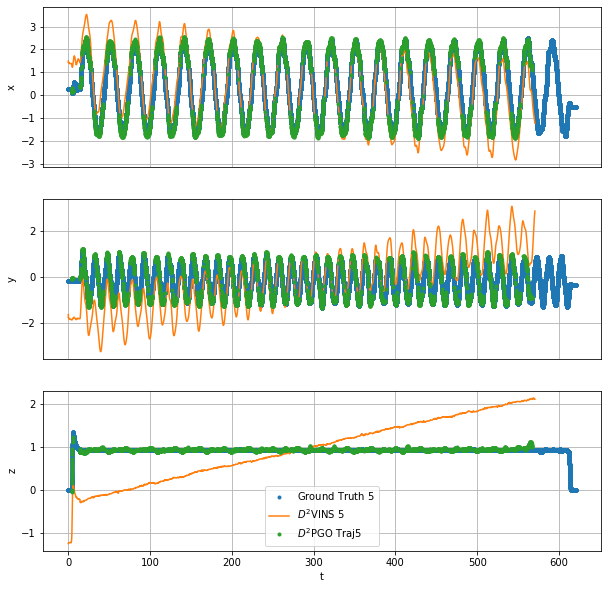

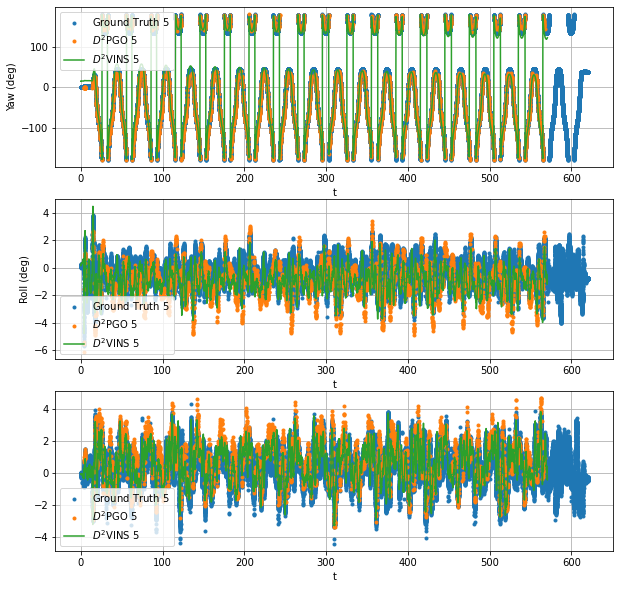

In [2]:
nodes = [1, 2, 3, 4, 5]
output_folder = "/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/outputs/d2slam-5-yaw/swarm"
data_folder="/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14"
dte = 550
paths, paths_pgo, t0 = read_multi_folder(output_folder, nodes, enable_pgo=True)
paths_gt, _ = read_paths(data_folder, nodes, prefix="eight_yaw_", suffix="-groundtruth.txt", t0=t0)
align_paths(paths, paths_gt, align_by_first=True, align_with_minize=True)
if paths_pgo is not None:
    align_paths(paths_pgo, paths_gt, align_by_first=True, align_with_minize=True)
display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
display(plot_relative_pose_err(1, nodes[1:], paths, paths_gt, dte=dte, show=False))
plot_fused(nodes, paths, poses_pgo=paths_pgo, poses_gt=paths_gt, figsize=(10,10))


In [ ]:
#Find the nearest pair of datasets
paths_gt = {}
t0 = None
nodes = [1, 2, 4, 5, 6, 7]
for i in nodes:
    paths_gt[i], t0 = read_path_from_csv(f"/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/eight_noyaw_{i}-groundtruth.txt", t0)
output_table = [i for i in range(0, 7)]
output_table[0] = "Drone"

dis_sum = 0.0
count = 0

for i in nodes:
    for j in nodes:
        if j > i:
            t = find_common_times(paths_gt[i].t, paths_gt[j].t)
            ate_pos = ATE_POS(paths_gt[i].pos_func(t), paths_gt[j].pos_func(t))
            dis_sum += ate_pos
            count += 1
            print(f"i={i}, j={j} ate_pos={ate_pos}")
print(f"Average ate_pos={dis_sum/count}")


In [ ]:
#Find the nearest pair of datasets
paths_gt = {}
t0 = None
nodes = [1, 2, 3, 4, 5]
for i in nodes:
    paths_gt[i], t0 = read_path_from_csv(f"/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/eight_yaw_{i}-groundtruth.txt", t0)
output_table = [i for i in range(0, 7)]
output_table[0] = "Drone"

dis_sum = 0.0
count = 0

for i in nodes:
    for j in nodes:
        if j > i:
            t = find_common_times(paths_gt[i].t, paths_gt[j].t)
            ate_pos = ATE_POS(paths_gt[i].pos_func(t), paths_gt[j].pos_func(t))
            dis_sum += ate_pos
            count += 1
            print(f"i={i}, j={j} ate_pos={ate_pos}")
print(f"Average ate_pos={dis_sum/count}")
